    dataset algorithm  silhouette       ari       nmi
0     blobs    KMeans    0.843571  1.000000  1.000000
1     blobs  KMedoids    0.843571  1.000000  1.000000
2     blobs     AGNES    0.843571  1.000000  1.000000
3     blobs     Birch    0.843571  1.000000  1.000000
4     blobs    DBSCAN    0.067855  0.323224  0.511117
5     moons    KMeans    0.414965  0.262907  0.317155
6     moons  KMedoids    0.417297  0.305424  0.302113
7     moons     AGNES    0.392645  0.321945  0.432698
8     moons     Birch    0.397102  0.161587  0.225687
9     moons    DBSCAN         NaN  0.000000  0.000000
10  circles    KMeans    0.388290 -0.001324  0.000010
11  circles  KMedoids    0.381315 -0.001192  0.000120
12  circles     AGNES    0.357685  0.002228  0.002904
13  circles     Birch    0.350199 -0.000593  0.000652
14  circles    DBSCAN         NaN  0.000000  0.000000


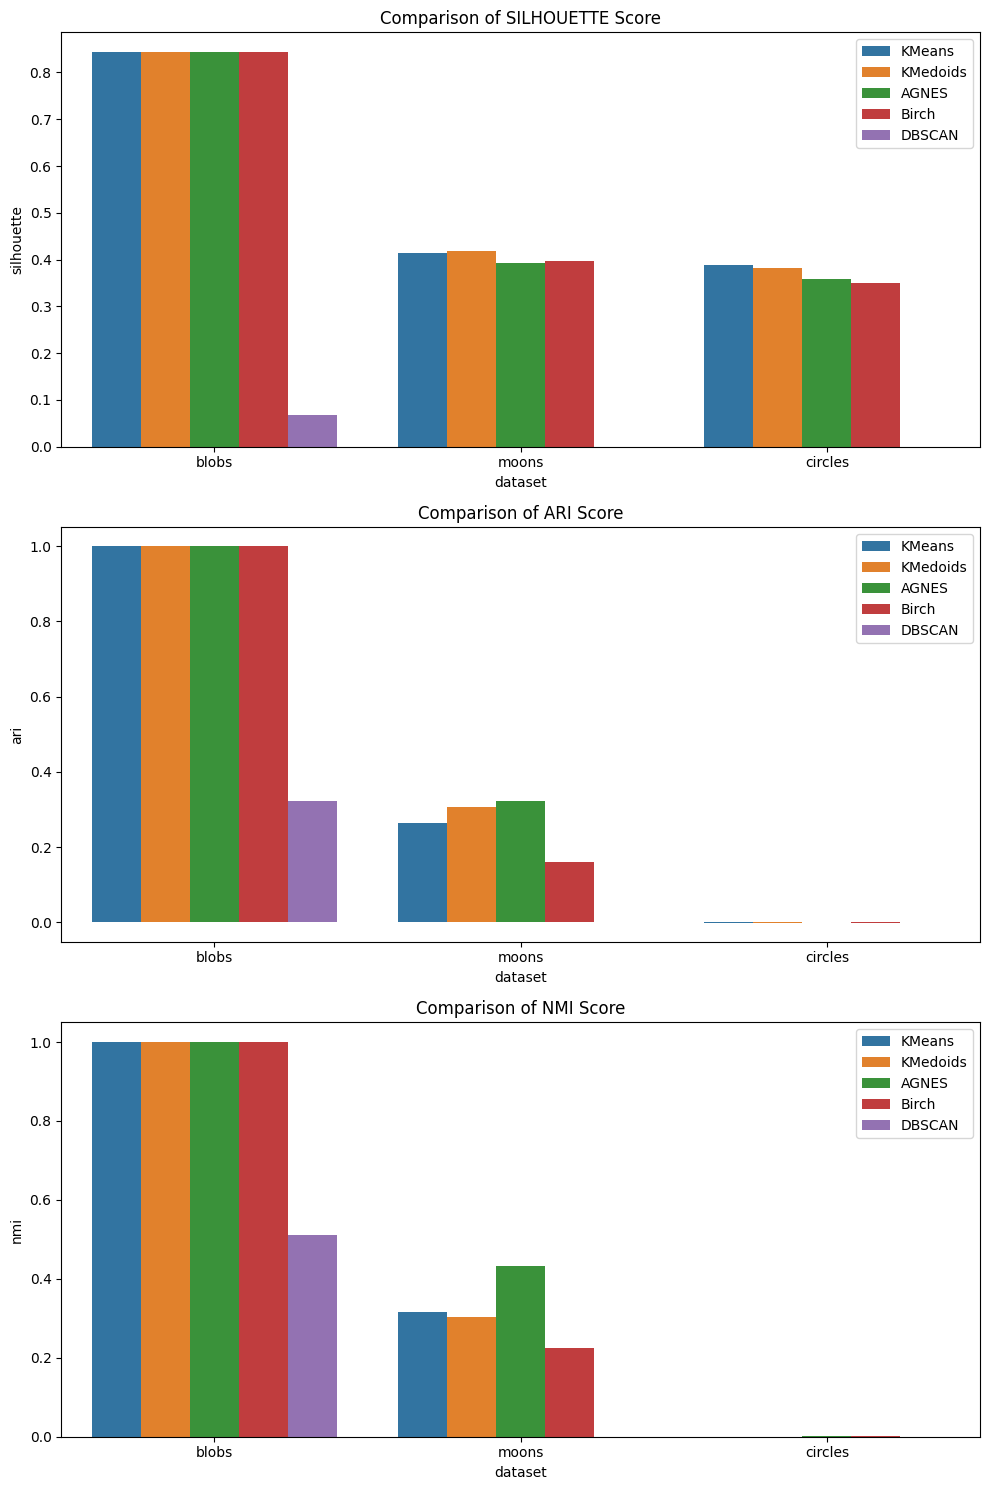

In [4]:
# Install the scikit-learn-extra package
!pip install scikit-learn-extra

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch, DBSCAN
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, adjusted_rand_score, normalized_mutual_info_score

# Generate synthetic datasets
datasets = {
    'blobs': make_blobs(n_samples=1000, centers=3, random_state=42),
    'moons': make_moons(n_samples=1000, noise=0.1, random_state=42),
    'circles': make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)
}

# Initialize results dictionary
results = {
    'dataset': [],
    'algorithm': [],
    'silhouette': [],
    'ari': [],
    'nmi': []
}

# Define a function to evaluate clustering
def evaluate_clustering(data, labels_true, labels_pred):
    # Check if there are at least two clusters
    if len(set(labels_pred)) < 2:
        return None, adjusted_rand_score(labels_true, labels_pred), normalized_mutual_info_score(labels_true, labels_pred)
    
    silhouette = silhouette_score(data, labels_pred)
    ari = adjusted_rand_score(labels_true, labels_pred)
    nmi = normalized_mutual_info_score(labels_true, labels_pred)
    return silhouette, ari, nmi

# List of clustering algorithms
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=3, random_state=42, n_init='auto'),
    'KMedoids': KMedoids(n_clusters=3, random_state=42),
    'AGNES': AgglomerativeClustering(n_clusters=3),
    'Birch': Birch(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.3, min_samples=10)
}

# Perform clustering and evaluation
for dataset_name, (data, labels_true) in datasets.items():
    for algo_name, algorithm in clustering_algorithms.items():
        # Fit the algorithm to the data
        algorithm.fit(data)
        
        # Get predicted labels
        if hasattr(algorithm, 'labels_'):
            labels_pred = algorithm.labels_
        else:
            labels_pred = algorithm.predict(data)
        
        # Evaluate clustering
        silhouette, ari, nmi = evaluate_clustering(data, labels_true, labels_pred)
        
        # Store results
        results['dataset'].append(dataset_name)
        results['algorithm'].append(algo_name)
        results['silhouette'].append(silhouette if silhouette is not None else np.nan)
        results['ari'].append(ari)
        results['nmi'].append(nmi)

# Create a DataFrame to display results
results_df = pd.DataFrame(results)
print(results_df)

# Plotting the results
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
metrics = ['silhouette', 'ari', 'nmi']

for i, metric in enumerate(metrics):
    sns.barplot(data=results_df, x='dataset', y=metric, hue='algorithm', ax=axes[i])
    axes[i].set_title(f'Comparison of {metric.upper()} Score')
    axes[i].legend(loc='upper right')

plt.tight_layout()
plt.show()
